In [4]:
# 다중 퍼셉트론으로 손글씨 분류 
# 다층 퍼셉트론 구현하고 딥 러닝을 통해서 숫자 필기 데이터를 분류 
# 사이킷런 패키지에서 제공하는 분류용 예제 데이터를 이용 
# 0 ~ 9 까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드 
# 각 image 사이즈 8 * 8 = 64 픽셀 해당도의 흑백 이미지 , 이미지 갯수 : 1,797개 

import matplotlib.pyplot as plt # python as 애칭 (시각화 라이브러리)
from sklearn.datasets import load_digits 

digits = load_digits() # 1,979개 이미지 데이터 로드 

# 첫번째 샘플을 출력 .images[인덱스]를 사용하면 해당 인덱스 이미지 행렬로서 출력가능
# 8 x 8 행렬 출력 
# 0을 흰색 도화지 , 0보다 큰 숫자들을 검정색으로 상상해보면 숫자 0에 실루엣처럼 보임
print(digits.images[0])


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [15]:
# 실제로 레이블도 숫자 0 인지 첫번째 샘플레이어 확인
print(digits.target[0])

# 실제 셈플의 레이블이 몇개인지 확인 
# len() 함수를 이용하여 전체 이미지 갯수를 파악한다.
print("전체 샘플의 수 : " , len(digits.images))

0
전체 샘플의 수 :  1797


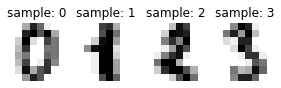

In [21]:
# 상위 5개만 샘플이미지를 확인
# zip 설명 images 와 target 을 하나로 묶기 위한것 
"""
 image = [1, 2, 3, 4]
 label = [사과, 자몽, 바나나, 수박]
 list(zip(images, label))
 1 사과 , 2 자몽 3 바나나 4 수박 
"""
images_and_lables = list(zip(digits.images, digits.target))

# enumerate 설명이 필요 
# 이미지 시각화 
for index , (image, label) in enumerate(images_and_lables[:4]) : 
    plt.subplot(2, 5 , index + 1) # input (이미지 target , 보여줄 이미지 갯수 , 반복 )
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [23]:
# 상위 5개의 레이블 확인 
# range 설명필요 

for i in range(5): 
    # label test print code 
    print(i, "번 index sample label : " , digits.target[i])


0 번 index sample label :  0
1 번 index sample label :  1
2 번 index sample label :  2
3 번 index sample label :  3
4 번 index sample label :  4


In [25]:
# 이제 훈련 데이터 와 레이블을 각 x y 저장 
# images sample 8x8 행렬로 저장 

# digits.data 를 사용 8x8 -> 64차원의 백터로 변환해서 저장한 상태

# data test print code
# 64차원의 백터로 저장된것을 확인 
print(digits.data[0]) 

x = digits.data # 이미지 
y = digits.target # 각 이미지 레이블 

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [26]:
# 다층 퍼셉트론 분류기 만들기 

# 파이토치 기초 필요 
# Loss funtion 등등이 필요 

import torch
import torch.nn as nn
from torch import optim 

model = nn.Sequential (
    nn.Linear(64,  32), # input_layer = 64 hidden_layer1 = 32
    nn.ReLU(), 
    nn.Linear(32, 16) , # input_layer = 32 hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10)   # input_layer = 16 output_layer = 10 
    # CrossEntropyLoss() : output_layer = 2 이상인 경우
)
x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

loss_fn = nn.CrossEntropyLoss() # 이 함수는 소프트맥스 함수를 포함 

optimizer = optim.Adam(model.parameters())

losses = [] 
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x) 
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0 :
        # train print code 
        print('Epoch {:4d}/{} loss : {:.6f}'.format(epoch, 100 , loss.item()))
    
    # append 설명 
    losses.append(loss.item())

Epoch    0/100 loss : 2.528834
Epoch   10/100 loss : 2.160639
Epoch   20/100 loss : 1.911613
Epoch   30/100 loss : 1.562537
Epoch   40/100 loss : 1.184655
Epoch   50/100 loss : 0.838152
Epoch   60/100 loss : 0.578841
Epoch   70/100 loss : 0.411100
Epoch   80/100 loss : 0.305692
Epoch   90/100 loss : 0.239095


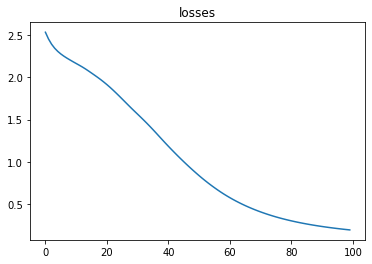

In [31]:
plt.title('losses')
plt.plot(losses)